# Project : Iris - Classification of flowers 

## Goal : To analysis is to investigate the relationship between sepal and petal dimensions and Iris flower species classification.

### Objectives:


### (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.
### (Q.2) Utilizing machine learning algorithms such as logistic regression, decision trees, and k-nearest neighbors to classify Iris flowers based on their morphological attributes.
### (Q.3)Evaluating the predictive performance of each model to determine which features (sepal length, sepal width, petal length, petal width) contribute most significantly to accurate species classification


## Import libraries and modules

In [1]:
# standard imports
import os
# Third -party imports
import pandas as pd # for data processing, I/O csv file
import numpy as np # for linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


## Load dataset

In [2]:
iris=pd.read_csv(r"C:\Users\arunr\Desktop\ABADS Batch 12\Python\Daniel\CAPSTONE Project\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Understanding

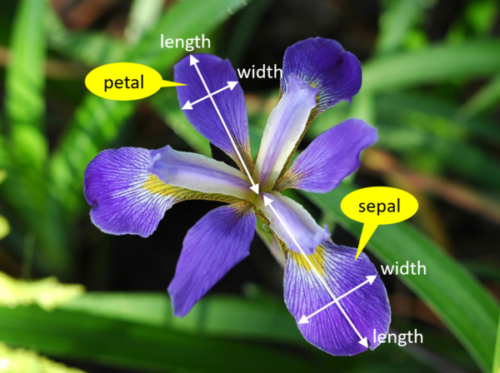

## Dataset column informations:

In [3]:
#number of rows and columns
iris.shape

(150, 6)

In [4]:
colmn = iris.columns
for i in colmn:
    print(i)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Count for Missing Data

In [6]:
print(iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Preprocessing dataset IRIS_Table 

## STEP :1  Data Cleaning : Remove Column 'Id'

In [7]:
iris.drop(columns = 'Id',inplace =True )

## Checking IRIS-Table after removing column: 'Id' 

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for column 'Id'

In [9]:
print('Id' in iris.columns)

False


#  Result : Column 'Id' is successfully removed from the IRIS-Table

## STEP :2 Rename columns

In [10]:
iris.rename({'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},axis =1,inplace = True)

### Checking info after Column Renaming

In [11]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

## STEP:3 Checking for missing values

In [12]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Result: No missing values found

## STEP :4 Checking given dataset is balanced or not :
### Get number of elements in each class.

In [6]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

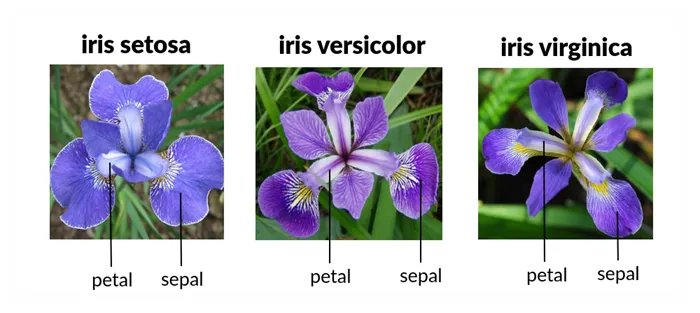

## Dataset Description summary: 
### There are 5 Atributes.Atribute information is listed below:
### 1. sepal width in cm
### 2. sepal length in cm
### 3. petal width in cm
### 4. petal length in cm
### 5. class : (i) Iris-setosa(50nos.)	(ii) Iris-versicolor(50nos.) (iii)Iris-virginica(50nos.)

# Observation: Thus IRIS dataset is a balanced dataset with each class label having equal 50 data points each.

# Data Visualization: Find Outliers and Eliminate them

<Axes: title={'center': 'BOXPLOT - IRIS DATASET'}>

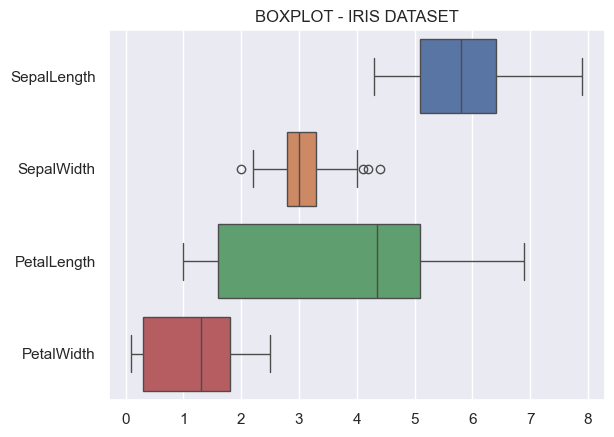

In [15]:
plt.title('BOXPLOT - IRIS DATASET')
sns.boxplot(data = iris,orient = 'h')

## Outlier Elimination:

In [16]:
q1 = iris['SepalWidth'].quantile(0.25)
q3 = iris['SepalWidth'].quantile(0.75)
iqr = q3 - q1
iris = iris[(iris['SepalWidth'] >= q1-1.5*iqr) & (iris['SepalWidth'] <= q3+1.5*iqr)]

# The number of rows and column after outlier treatment
iris.shape 

(146, 5)

### Obs : We can see that after outlier treatment the number of rows are reduced to 146 from 150

Axes(0.125,0.11;0.775x0.77)


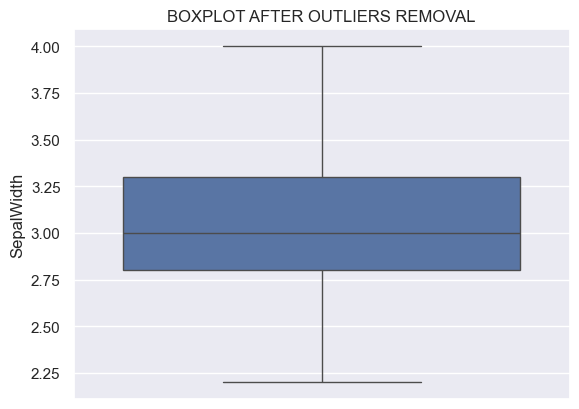

In [17]:
q = sns.boxplot(iris['SepalWidth'])
plt.title("BOXPLOT AFTER OUTLIERS REMOVAL")
print(q)

# (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.

### Box-Plot is used to find outliers in data and overall distribution of data
## Observation: Outliers in 'Iris' dataset is found in iris['SepalWidth']

## (Q1.{A}) Exploring Distribution between sepal length, sepal width, petal length, and petal width?

## 

Examine data distribution using Pair-Plot
### Analysis 1: 2D Pairplot with kind 'reg'

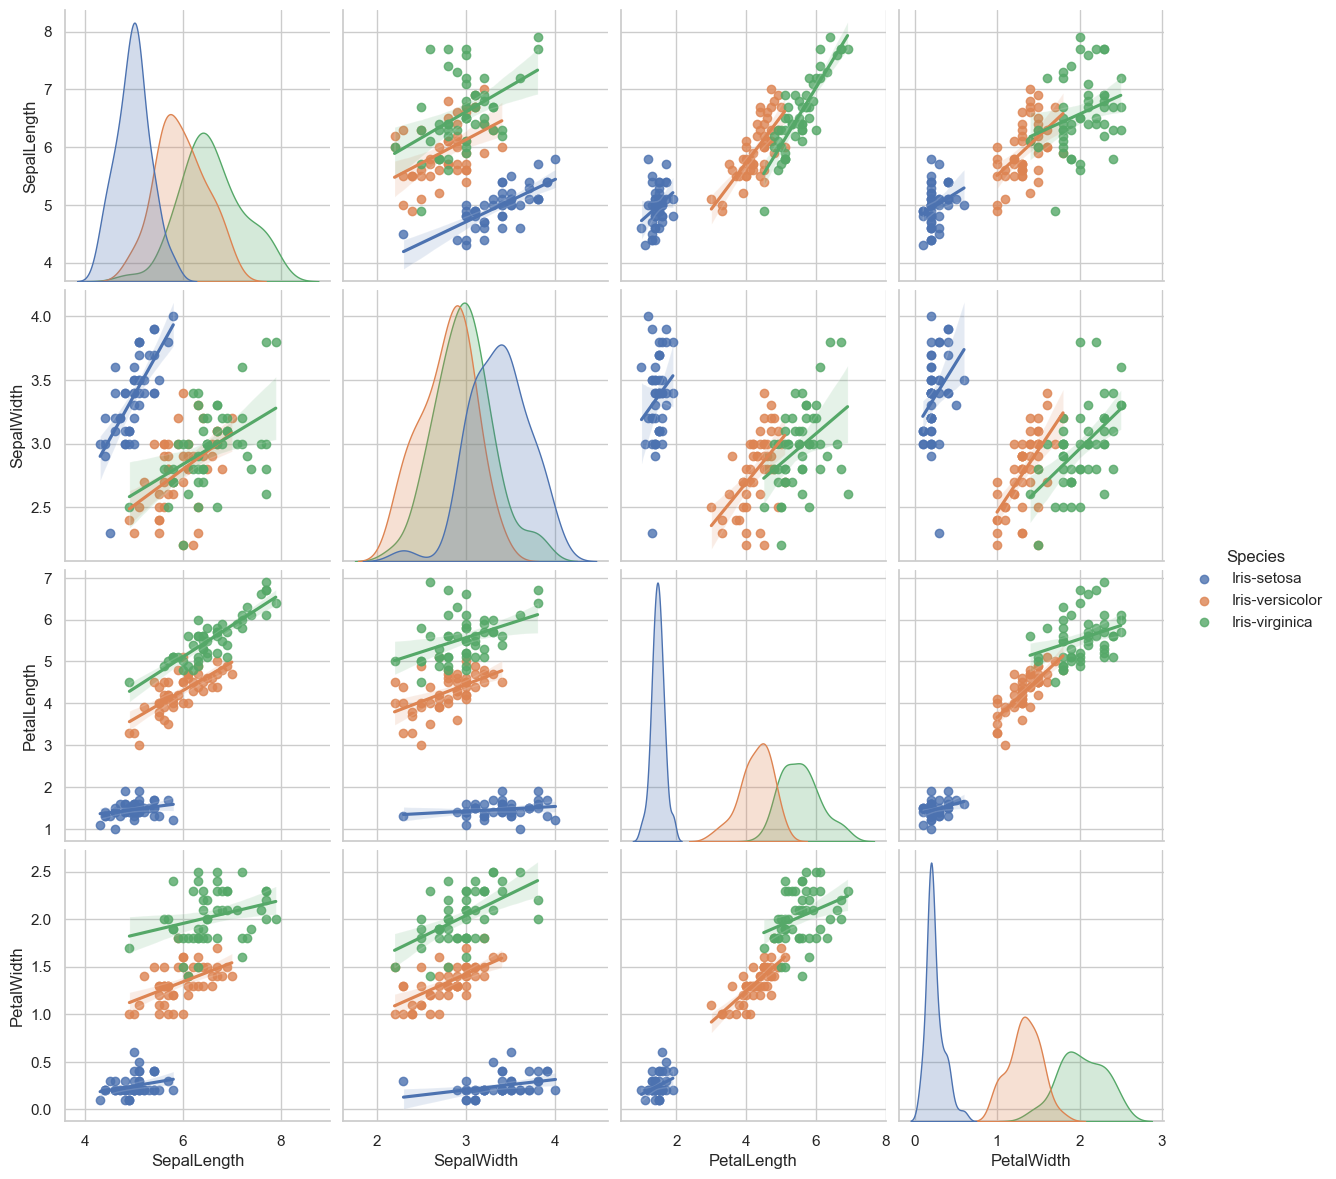

In [18]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species',kind ='reg', size =3)
plt.show()

## Examine data distribution using Pair-Plot
### Analysis 2: 2D Pairplot with kind 'kde'

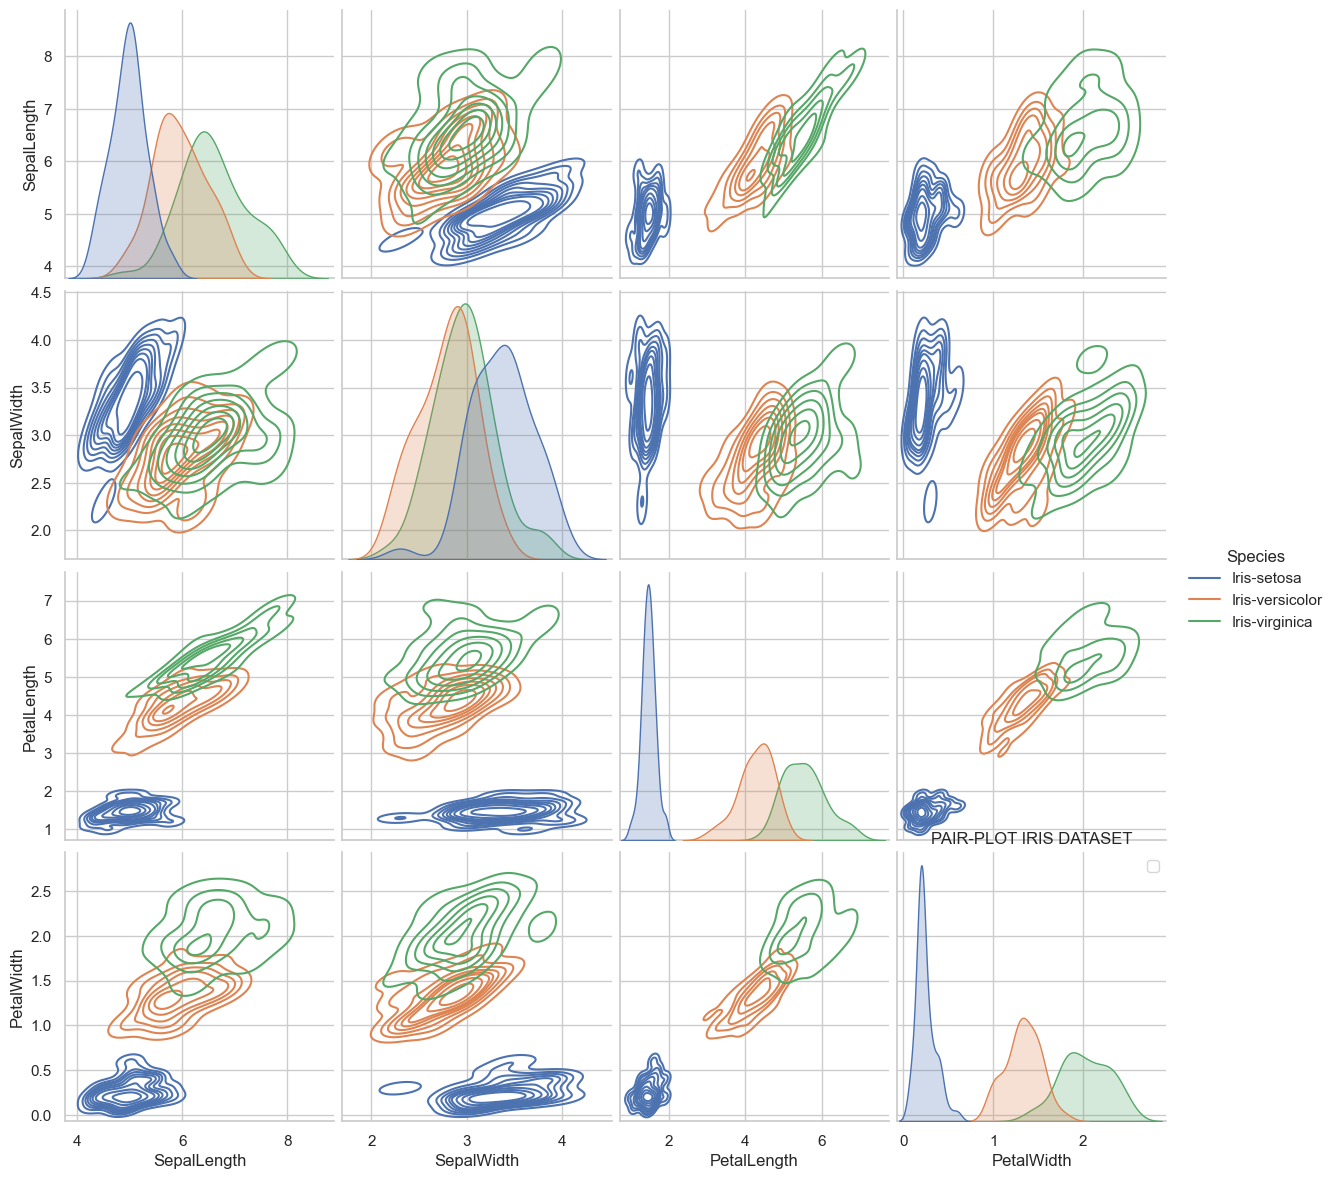

In [19]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue = 'Species',kind = 'kde',size = 3 )
plt.title("PAIR-PLOT IRIS DATASET")
plt.legend()
plt.show()         

## Observation: 
### (1)Iris-setosa is well separated from the other two flowers.
### (2)Iris virginica is the longest flower 
### (3)Iris setosa is the shortest flower

## Distribution plot

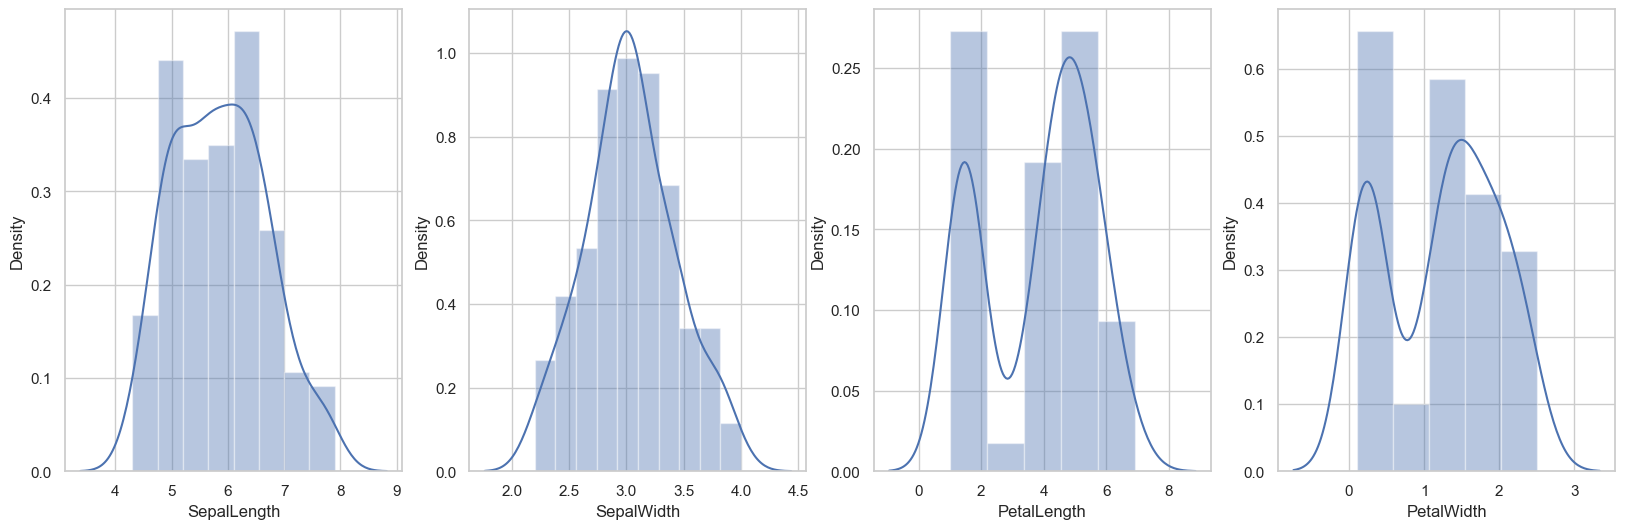

In [72]:

columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
fig = plt.figure(figsize=(20,6))
i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.distplot(iris[col])
    i+=1
plt.show()

## Distribution Plot is used for numerical variables. This helps to visualize the distribution of the data.

# Observation:
### SepalLength : Maximum distribution is around 5 to 6.5
### SepalWidth : Maximum distribution is around 3
### PetalLength : Maximum distribution is around 5
### PetalWidth : Maximum distribution is around 1.5

## (Q1.{B}) Exploring Correlation between sepal length, sepal width, petal length, and petal width?

## Correlation Matrix:

In [20]:
df1 = iris.loc[:,'SepalLength':'PetalWidth']
df1.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.113977,0.879374,0.822577
SepalWidth,-0.113977,1.000000,-0.397123,-0.329782
PetalLength,0.879374,-0.397123,1.000000,0.961755
PetalWidth,0.822577,-0.329782,0.961755,1.000000


## Heatmap 
### A heatmap of the correlation matrix helps to visualize the correlation between different features.

### Aim : To find Correlation between attributes.


<Axes: >

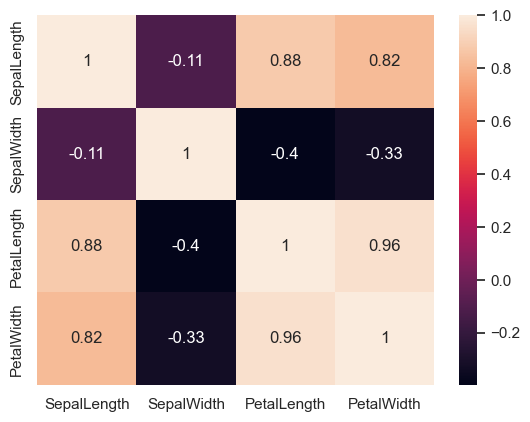

In [21]:
sns.heatmap(df1.corr(),annot=True)

## Result : Correlation values 
### 1. Btw Petal_Width & Petal_Length   = 0.96 ---> Highest correlation value
### 2. Btw Sepal_Length & Petal_Length  = 0.87
### 3. Btw Petal_Width & Sepal_Length   = 0.82

## STEP(3) Using BOXPLOT find Outliers

## Box plots provide a concise summary of the distribution, including quartiles, median, and potential outliers.

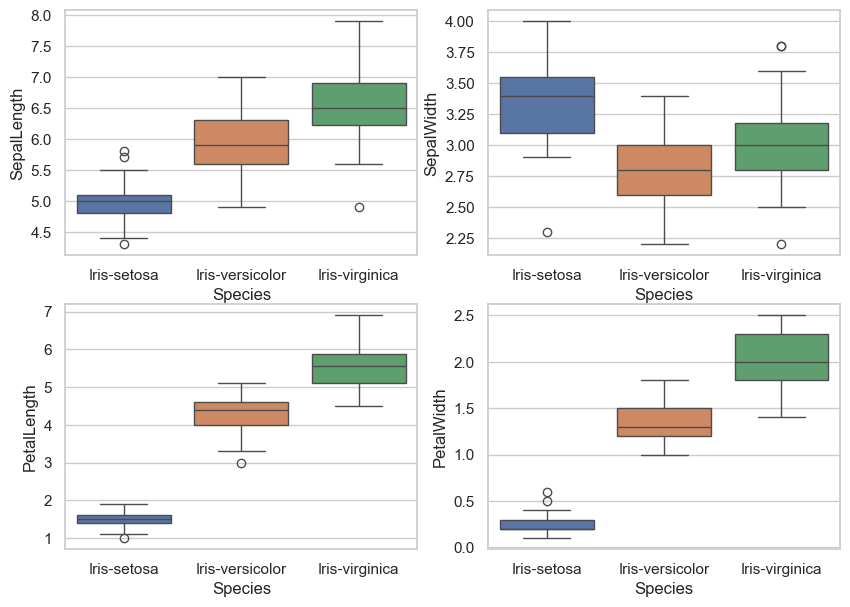

In [22]:
fig,axis =plt.subplots(2,2,figsize=(10,7))

sns.boxplot(x ='Species',y = 'SepalLength', data = iris,hue='Species', ax = axis[0,0])
sns.boxplot(x ='Species',y = 'SepalWidth', data = iris,hue='Species', ax = axis[0,1])
sns.boxplot(x ='Species',y = 'PetalLength', data = iris,hue='Species', ax = axis[1,0])
sns.boxplot(x ='Species',y = 'PetalWidth', data = iris,hue='Species', ax = axis[1,1])

plt.show()

## Observation:
### (1) Iris-setosa : It usually have smaller features except SepalWidth
### (2) Iris-versicolor : All three features are average
### (3) Iris-virginica : It's having bigger features except SepalWidth


## (B) VIOLIN-PLOT IN SUBPLOT METHOD:

### Violin Plot combine the features of a box plot with a kernel density estimation to show the distribution shape

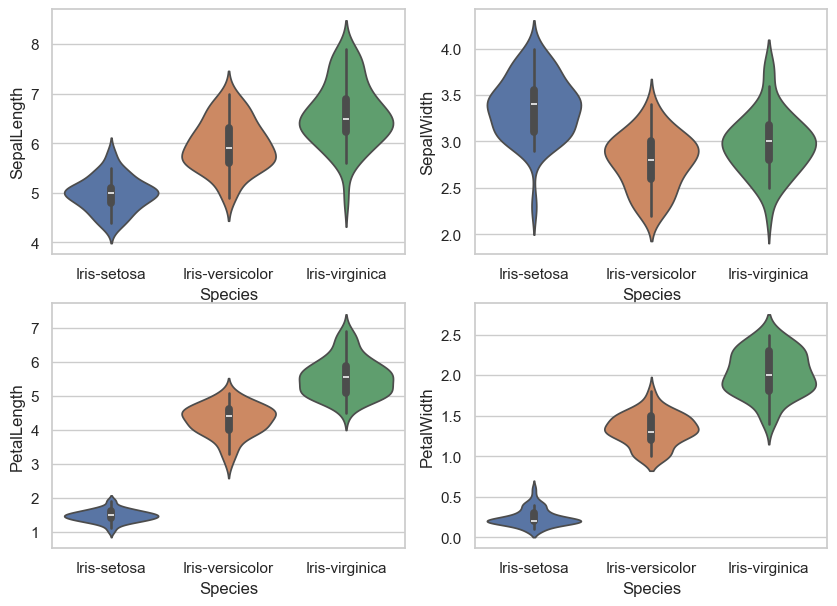

In [23]:
fig,axis =plt.subplots(2,2,figsize=(10,7))

sns.violinplot(x ='Species',y = 'SepalLength', data = iris,hue='Species', ax = axis[0,0])
sns.violinplot(x ='Species',y = 'SepalWidth', data = iris,hue='Species', ax = axis[0,1])
sns.violinplot(x ='Species',y = 'PetalLength', data = iris,hue='Species', ax = axis[1,0])
sns.violinplot(x ='Species',y = 'PetalWidth', data = iris,hue='Species', ax = axis[1,1])
plt.show()

## Observation:
### (1) Iris-versicolor : It's having average features
### (2) Iris-virginica : It's having bigger features except SepalWidth
### (3) Iris-setosa : It usually have smaller features except SepalWidth

# Conclusion :
### (1) Data is balanced
### (2) Strong correlation between PetalLenght and PetalWith
### (3) Iris-Setos is easily separable from other flowers, even using single feature
### (4) Iris-versicolor and Iris-virginica are difficult to seperate just using single feature
 

# (Q.2)Utilizing machine learning algorithms such as logistic regression, decision trees, and k-nearest neighbors to classify Iris flowers based on their morphological attributes?

## Load Data:

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preparation

In [25]:
X = iris.iloc[:,0:4]  # Select all rows, not including 4th column
y = iris['Species']  # Select all rows, 4th column
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## TASK(1): Logistic Regression:
### Logistic Regression is a simple and interpretable classification algorithm.

## Splitting datast into train and test
### The attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("Train Shape :",X_train.shape)
print("Test Shape :",X_test.shape)

Train Shape : (109, 4)
Test Shape : (37, 4)


In [27]:
#Create a Regression Model
log = LogisticRegression()

#Fit the model on the training data
log.fit(X_train,Y_train)

#Make prediction on testing data
prediction=log.predict(X_test)
# Calculate prediction accuracy
accuracy = accuracy_score(prediction,Y_test)
print('\nThe Accuracy of the Logistic Regression:')
print('Accuracy = ', accuracy_score(prediction,Y_test))


The Accuracy of the Logistic Regression:
Accuracy =  1.0


### Summary : 100% accuracy is not acceptable. 
### The accuracy score indicates what portion of the predictions the model produced was correct. A higher accuracy number indicates more accurate predictions from the model. But model with 100% accuracy is not acceptable.

## Observation and Final Result: 
### After eliminating outilers Accuracy of Logostic Regrassion =100%

## TASK(2) : Decision Tree
### Decision Trees are easy to visualize and understand.

In [28]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

## Splitting the data into train and test sets

In [52]:
X = iris.iloc[:,0:4]  # Select all rows, not including 4th column
y = iris['Species']  # Select all rows, 4th column
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)
print("Train Shape :",X_train.shape)
print("Test Shape :",X_test.shape)

Train Shape : (102, 4)
Test Shape : (44, 4)


### Defining an object for Decision Tree Classifier and fitting for whole dataset

In [30]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

## Print Text Representation

In [31]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.65
|   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_0 <= 6.25
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_0 >  6.25
|   |   |   |--- class: Iris-virginica



### Plotting of Deition-Tree


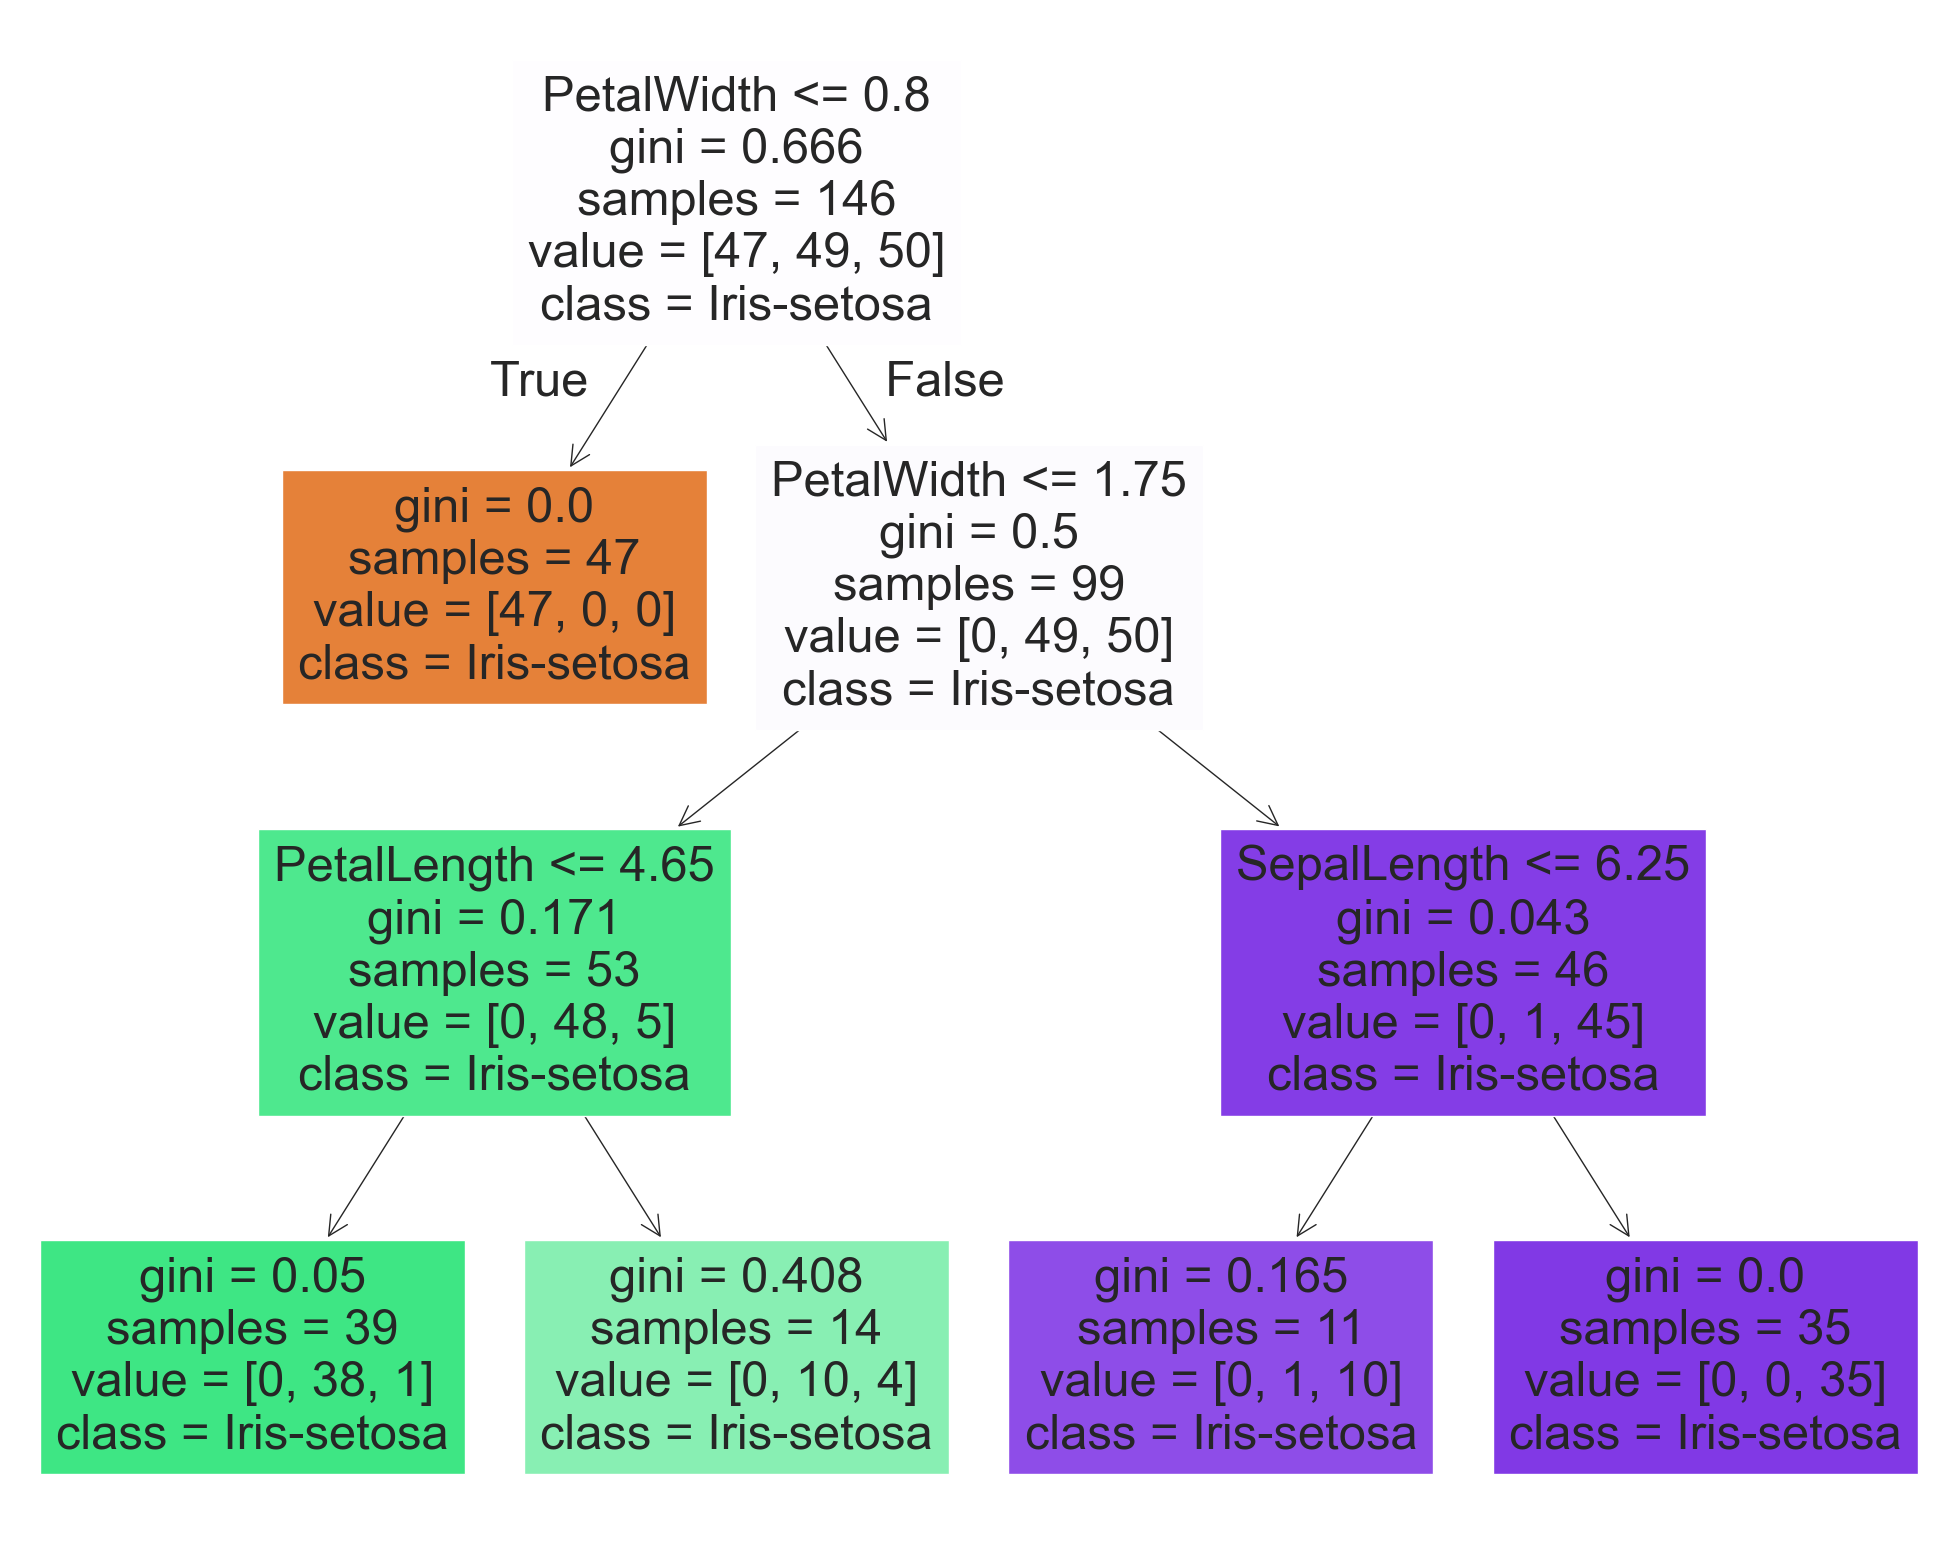

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names = X.columns,  
                   class_names = iris['Species'],
                   filled=True)

### Defining an object for DTC and fitting for train dataset

In [58]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9333333333333333


## Observation of Decision Tree : 
### (1)The accuracy of the DT has slightly overfit
### (2)Shall try hyperparameter tuning to reduce overfitting if possible

## Classification for test before hyperparameter tuning


In [59]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



## Hyperparameter Tuning of DTC

In [60]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)
print("Best Parameter:")
gsearch.best_params_

Best Parameter:


{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

## Passing best parameter for the Hyperparameter Tuning

In [61]:
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
dt_h1 = confusion_matrix(y_train, y_pred_train)
print(dt_h1)
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))
dt_h2 = confusion_matrix(y_test, y_pred)
print(dt_h2)


Confusion Matrix - Train: 
 [[35  0  0]
 [ 0 40  1]
 [ 0  1 39]]
[[35  0  0]
 [ 0 40  1]
 [ 0  1 39]]

 Confusion Matrix - Test: 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


## Classification for test after hyperparameter tuning

In [62]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



### Result after Hypertuning 
### Accuracy of Train & Tree:

In [42]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9901960784313726
Accuracy of Decision Tree-Test:  0.9545454545454546


### Observation :  Overfitting has been reduced slightly

## TASK(3) : K - Nearest Neighbour (KNN)
### KNN is a non-parametric method used for classification.

## Import libraries

In [43]:
from sklearn.neighbors import KNeighborsClassifier


## Check X and y for KNN Classifier

In [44]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Split data into train & test parameters for KNN Classifier

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print("Train Shape :",X_train.shape)
print("Test Shape :",X_test.shape)
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train, y_train)


Train Shape : (116, 4)
Test Shape : (30, 4)


KNeighborsClassifier()

In [47]:
## Print Text Representation
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

## Accuracy of KNN : 

In [48]:
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {round(acc*100,2)}%")

Accuracy: 96.67%


## Heatmap Representation:

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


<Axes: >

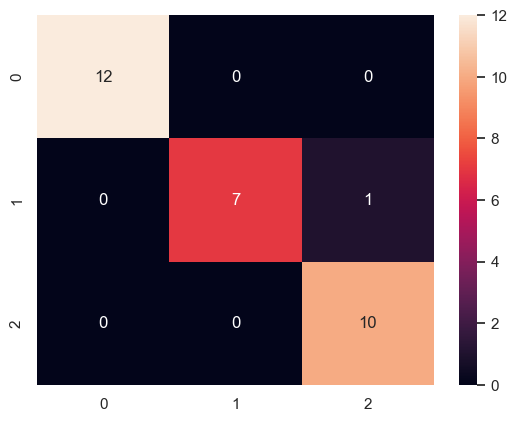

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

# Result : 
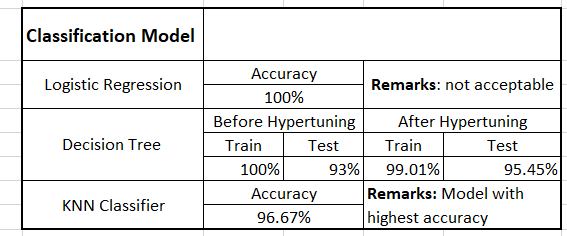

## Hence KNN Model is accepted.